# Exploratory Data Analysis (EDA) on Animal Shelter Outcomes

This notebook is used for performing exploratory data analysis on the training dataset of animal shelter outcomes. The goal is to understand the distribution of the outcome types and other features.

<h4>Enter your computer's home directory</h4>

In [1]:
home_dir = r"/Users/wrngnfreeman/Github/Shelter-Animal-Outcomes"

#### Import required modules

In [2]:
import os
import sys
import random
import pandas as pd

project_name = r"Shelter-Animal-Outcomes"
workspace_folder = os.path.abspath("").split(project_name)[0] + project_name

sys.path.insert(0, workspace_folder + r"/src")
import data_processing, viz

## Load datasets

In [3]:
AnimalID=r"AnimalID"

# Load and process the dataset
processed_df, animal_data, breed, breed_mix, coat_color, coat_patterns = data_processing.process_data(
    raw_data_path=r"/Users/wrngnfreeman/Github/Shelter-Animal-Outcomes/data/Austin_Animal_Center_Outcomes__10_01_2013_to_05_05_2025_.csv",
    AnimalID=AnimalID,
    dep_var=r"OutcomeType"
)

# Display the few rows of the dataset
processed_df.loc[
    processed_df[AnimalID].isin(random.sample(processed_df[AnimalID].unique().tolist(), 5)),
    :
].drop(columns="BreedType").rename(columns={"Breed_broken": "Breed"})

,AnimalID,OutcomeType,Name,DateTime,AnimalType,AgeuponOutcome,SexuponOutcome,Sterilization,Breed,Mix,CoatColor,CoatPattern
95728,A733752,Adoption,NaN,2016-09-29T15:48:00,Cat,<6 months,Female,Intact,Domestic Shorthair,1.0,Brown,
95729,A733752,Adoption,NaN,2016-09-29T15:48:00,Cat,<6 months,Female,Intact,Domestic Shorthair,1.0,White,
96235,A734208,Adoption,Lady,2016-09-05T12:37:00,Dog,<15 years,Female,Sterilized,Pomeranian,1.0,Red,
96236,A734208,Adoption,Lady,2016-09-05T12:37:00,Dog,<15 years,Female,Sterilized,Pomeranian,1.0,White,
112707,A749082,Transfer,NaN,2017-05-11T15:51:00,Cat,<6 months,Male,Intact,Domestic Shorthair,1.0,Orange,
144868,A777058,Adoption,*Metallica,2018-09-19T19:21:00,Cat,<6 months,Male,Sterilized,Domestic Shorthair,1.0,Brown,
180642,A806358,Adoption,Roxie,2019-10-13T17:41:00,Dog,<6 months,Female,Sterilized,Labrador Retriever,1.0,Black,
180643,A806358,Adoption,Roxie,2019-10-13T17:41:00,Dog,<6 months,Female,Sterilized,Labrador Retriever,1.0,White,
180644,A806358,Adoption,Roxie,2019-12-06T19:07:00,Dog,<6 months,Female,Sterilized,Labrador Retriever,1.0,Black,
180645,A806358,Adoption,Roxie,2019-12-06T19:07:00,Dog,<6 months,Female,Sterilized,Labrador Retriever,1.0,White,


## Visualizations

### Distribution of the dependent variable "OutcomeType"

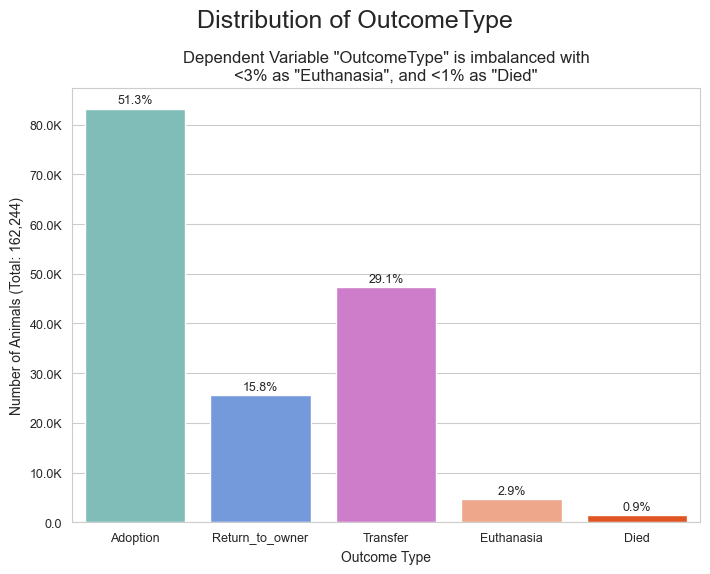

In [4]:
viz.viz_outcometype(
    home_dir=home_dir,
    processed_df=animal_data,
    chart_title='Distribution of OutcomeType')

### Distribution of AnimalType

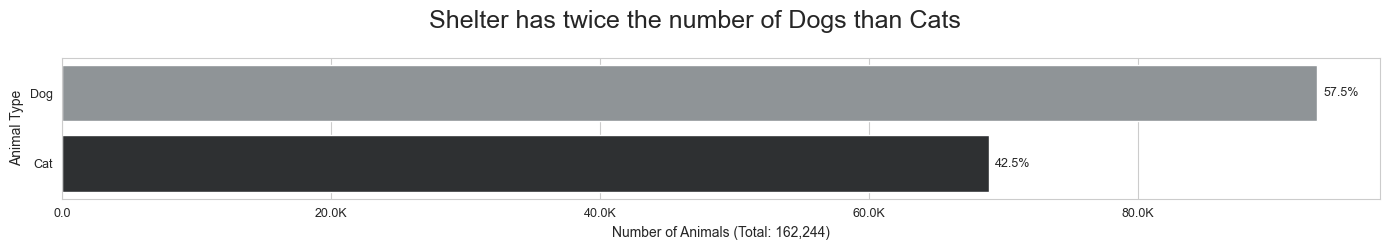

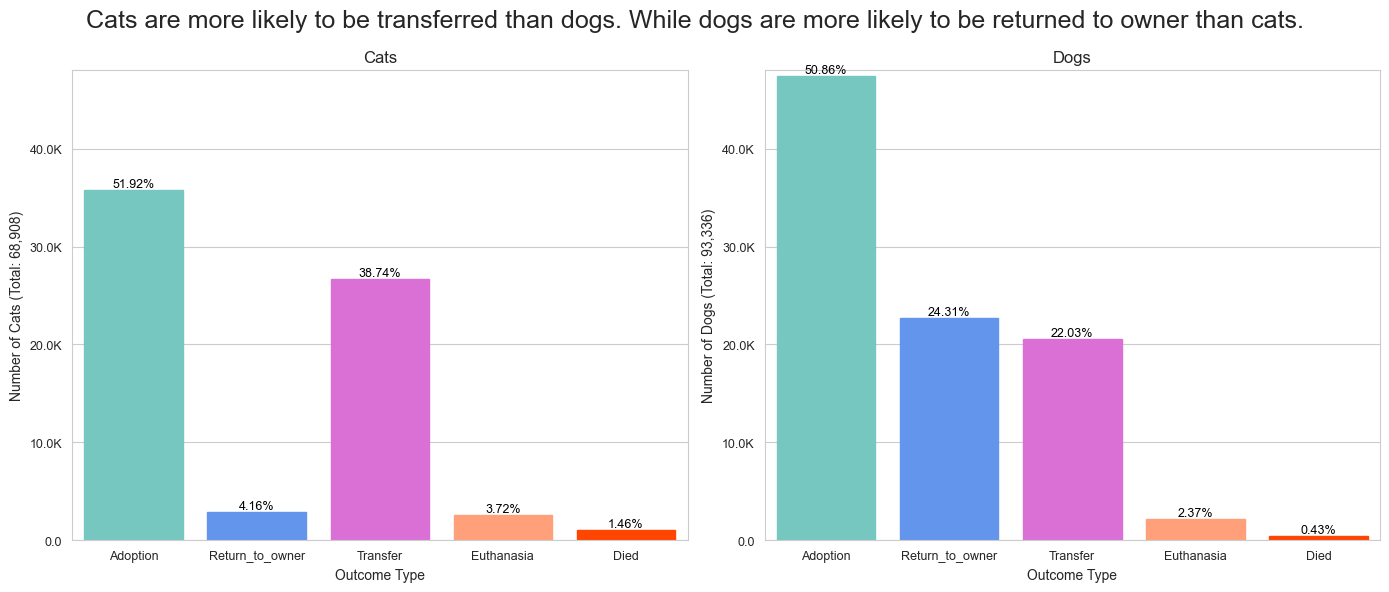

In [5]:
viz.viz_animal_type(
    home_dir=home_dir,
    processed_df=animal_data,
    chart_title1='Shelter has twice the number of Dogs than Cats',
    chart_title2='Cats are more likely to be transferred than dogs. While dogs are more likely to be returned to owner than cats.')

### How does Age determine the outcome of an animal?

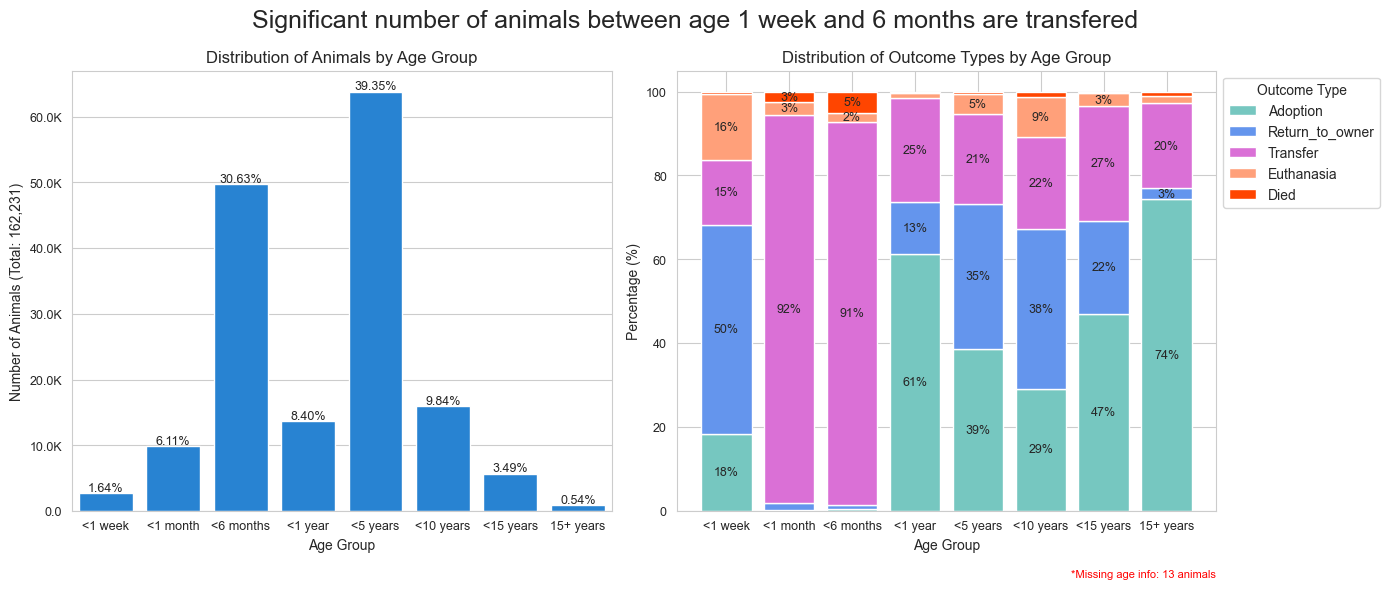

In [6]:
viz.viz_age(
    home_dir=home_dir,
    processed_df=animal_data,
    chart_title='Significant number of animals between age 1 week and 6 months are transfered')

### How does sex determine the outcome of an animal?

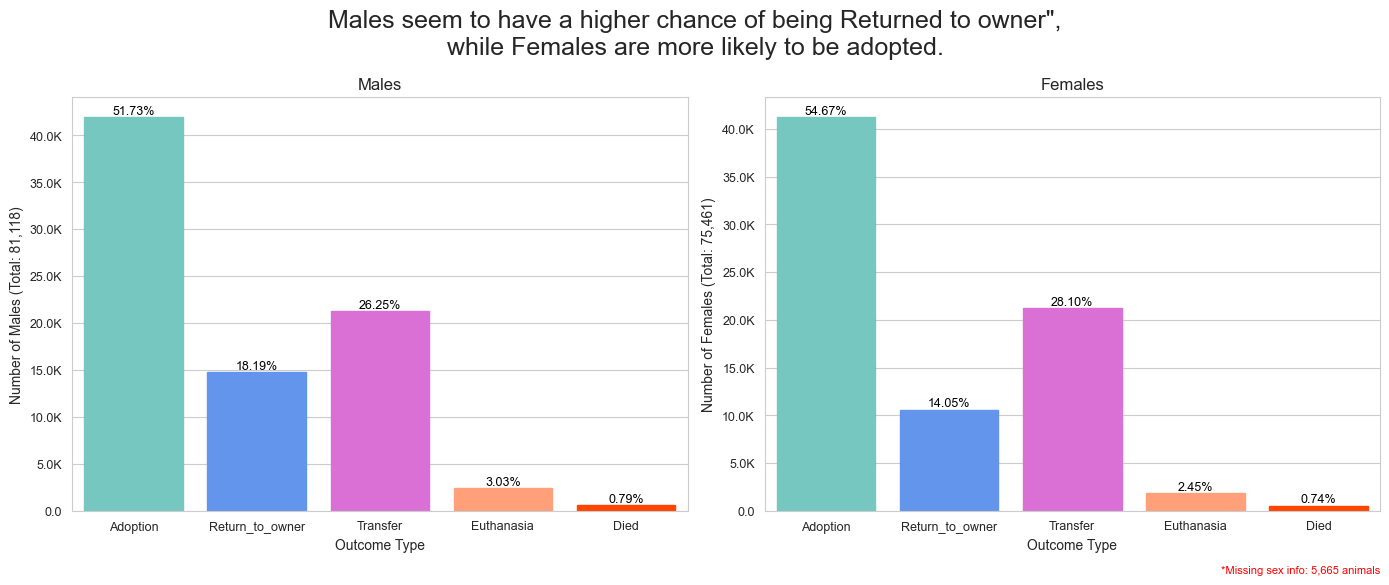

In [7]:
viz.viz_sex(
    home_dir=home_dir,
    processed_df=animal_data,
    chart_title='Males seem to have a higher chance of being Returned to owner",\nwhile Females are more likely to be adopted.')

### How does Sterilization determine the outcome of an animal?

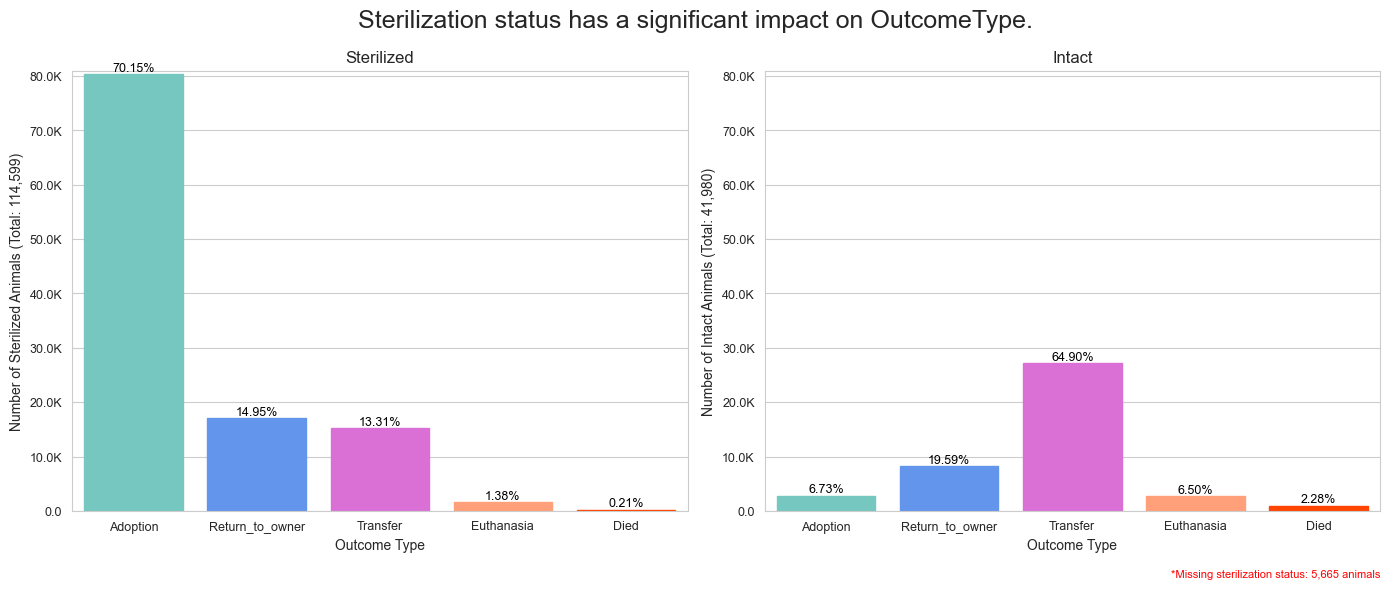

In [8]:
viz.viz_sterilization(
    home_dir=home_dir,
    processed_df=animal_data,
    chart_title='Sterilization status has a significant impact on OutcomeType.')

### What breeds do we have in the shelter?

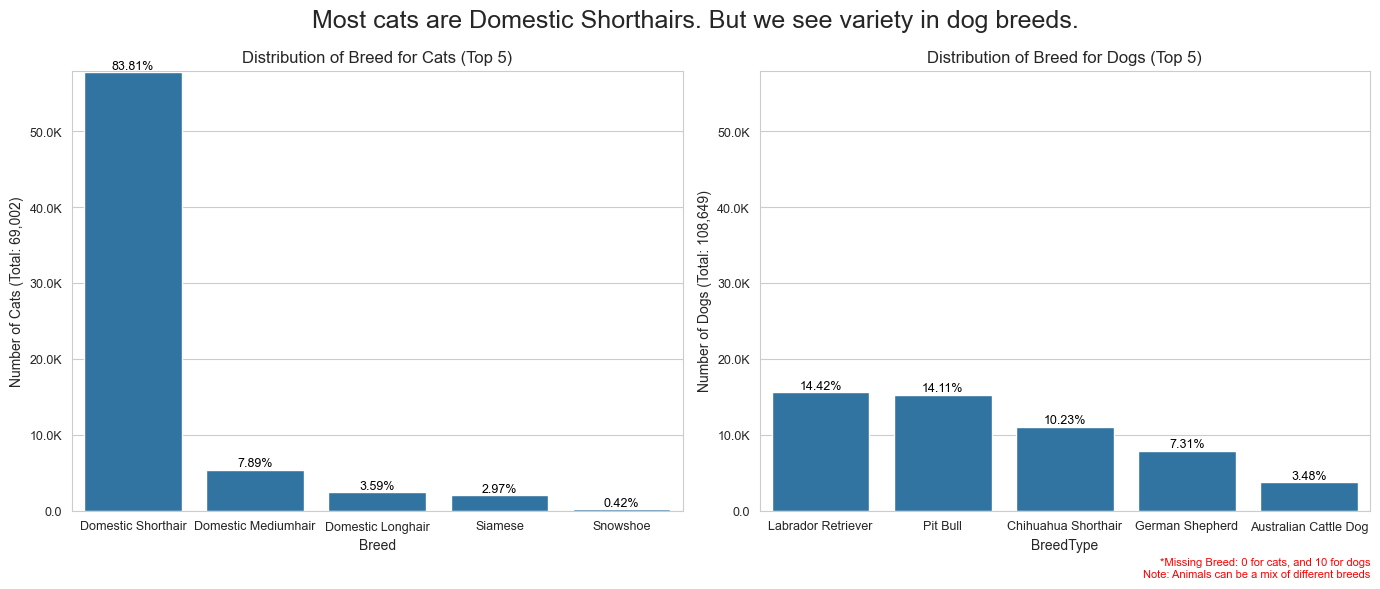

In [9]:
viz.viz_breed(
    home_dir=home_dir,
    processed_df=pd.merge(
        left=animal_data,
        right=breed,
        left_on=AnimalID,
        right_on=AnimalID,
        how='left'
    ),
    top_n=5,
    chart_title='Most cats are Domestic Shorthairs. But we see variety in dog breeds.'
)

### How does being a pure breed or mixed breed animal determine the outcome of that animal?

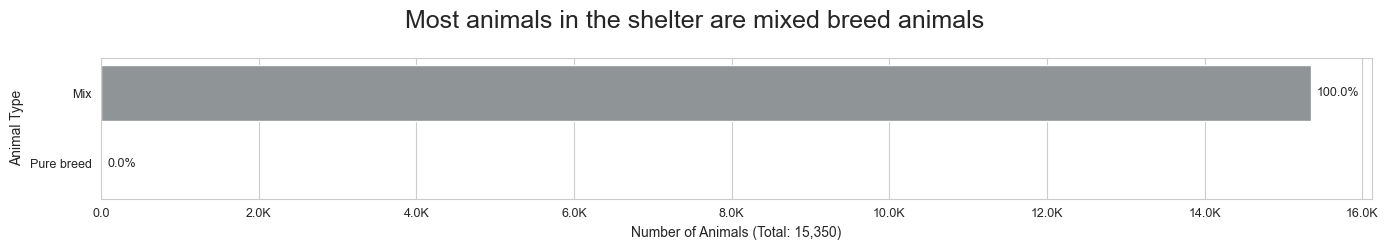

/Users/wrngnfreeman/GitHub/Shelter-Animal-Outcomes/src/viz.py:557: RuntimeWarning: invalid value encountered in double_scalars
  percentage = (height / total_pure) * 100


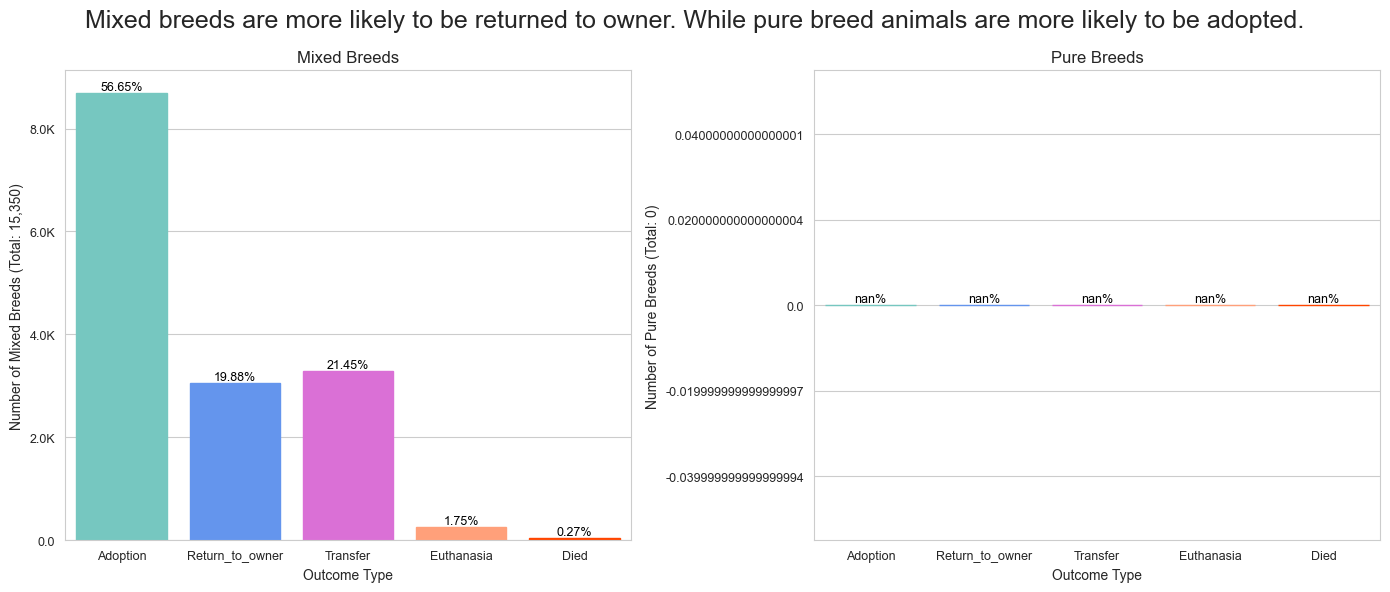

In [10]:
viz.viz_breed_mix(
    home_dir=home_dir,
    processed_df=pd.merge(
        left=animal_data,
        right=breed_mix,
        left_on=AnimalID,
        right_on=AnimalID,
        how='left'
    ),
    chart_title1='Most animals in the shelter are mixed breed animals',
    chart_title2='Mixed breeds are more likely to be returned to owner. While pure breed animals are more likely to be adopted.'
)

### What colored animals do we have in the shelter?

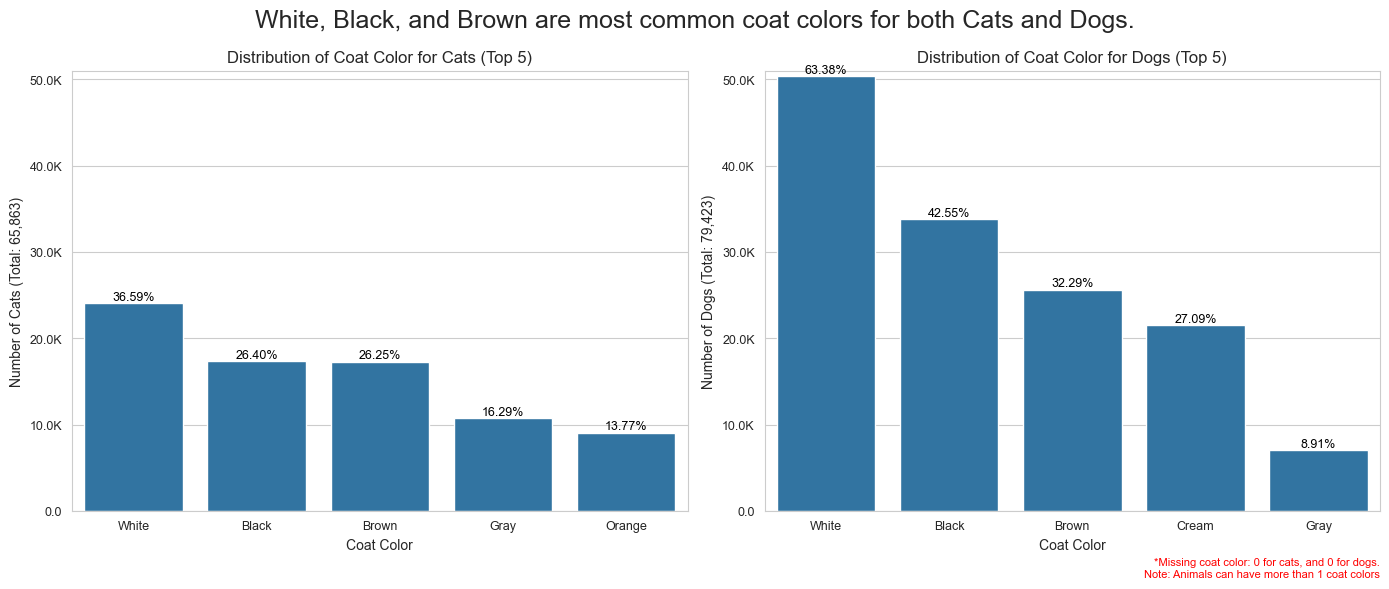

In [11]:
viz.viz_coatcolor(
    home_dir=home_dir,
    processed_df=pd.merge(
        left=animal_data,
        right=coat_color,
        left_on=AnimalID,
        right_on=AnimalID,
        how='left'
    ),
    top_n=5,
    chart_title='White, Black, and Brown are most common coat colors for both Cats and Dogs.'
)

### What coat patterns do the animals have in the shelter?

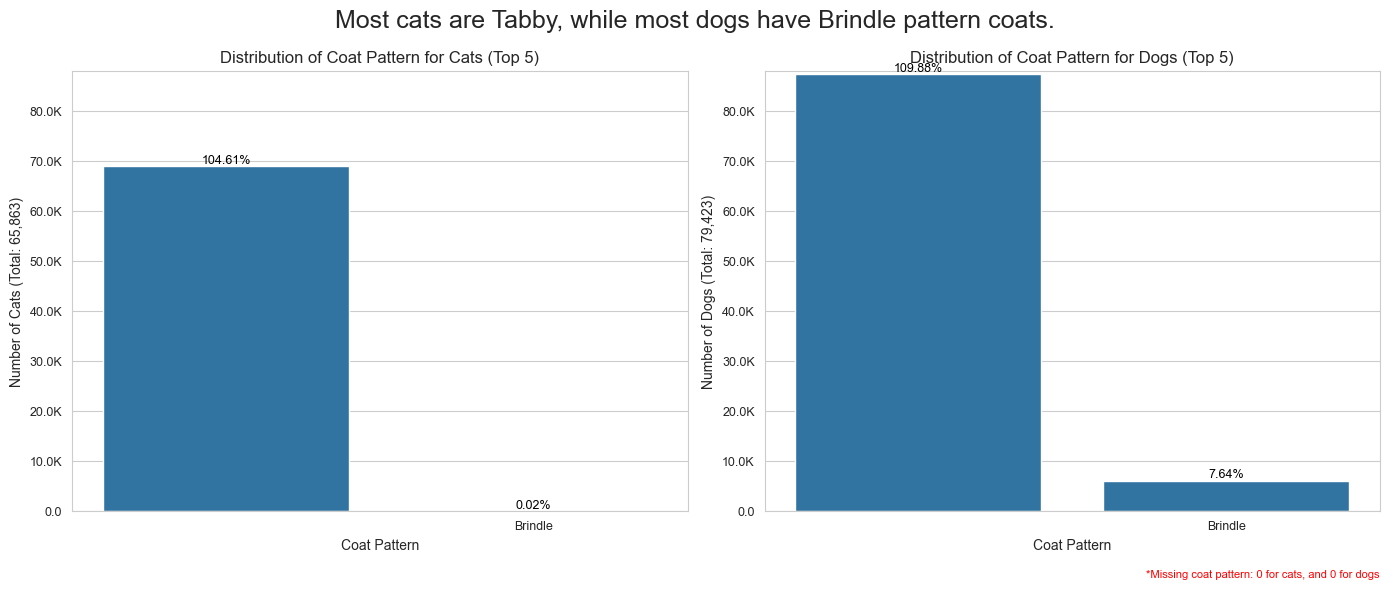

In [12]:
viz.viz_coatpattern(
    home_dir=home_dir,
    processed_df=pd.merge(
        left=animal_data,
        right=coat_patterns,
        left_on=AnimalID,
        right_on=AnimalID,
        how='left'
    ),
    top_n=5,
    chart_title='Most cats are Tabby, while most dogs have Brindle pattern coats.'
)

## Conclusion

This exploratory analysis provides insights into the distribution of the dependent variable "OutcomeType", and other factors that effect animal's outcome at the shelter. Results from a machine learning model is expected to be in-line with these findings.

Explore our interactive Tableau Dashboard to delve deeper into the dataset. This tool provides a user-friendly interface for detailed analysis.

[Interactive Tableau Dashboard (link 1)](https://public.tableau.com/views/InteractivePetManagementDashboard/Dashboard1?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link) <br>
[Interactive Tableau Dashboard (link 2)](https://public.tableau.com/views/InteractivePetManagementDashboard_17435387085530/Dashboard1?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)